In [1]:
import sys  
sys.path.insert(1, '../')

from src.models.vit_gusa import ViTGuSA
from utils.loader import Loader
from utils.transform import transform
from src.visualization.visualize_attention import visualize_attention
# import some libraries
import torch
import math
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
import pandas as pd

## Loading the model :

In [2]:
model=ViTGuSA(4,"cpu",patch_size=8,freeze_backbone=True,head_depth=1)
model.load_state_dict(torch.load('../weights/model_vit_hd1_1.pth',map_location='cpu'))

<All keys matched successfully>

## Loading the demo image :
you can upload a new image by clicking on the "Upload" button


In [3]:
img=Image.open('../data/image/image_12.jpg')

In [4]:
print('Upload the image:')
loader = Loader()
print('Upload the mask:')
loader_mask=Loader()

Upload the image:


FileUpload(value={}, accept='image/*', description='Upload')

Upload the mask:


FileUpload(value={}, accept='image/*', description='Upload')

Uncomment the following cell if you want to use the uploaded image :

In [17]:
img = loader.getLastImage()
# mask=loader_mask.getLastImage()
img=img.resize((224,224))

In [18]:
img_transformed=transform(img,img_size=(224,224),patch_size=8).unsqueeze(0)

In [19]:
img_transformed.shape

torch.Size([1, 3, 224, 224])

In [20]:
with torch.no_grad():
    model.eval()
    output,roi=model(img_transformed)

In [21]:
classes_df=pd.read_csv('../classes.tsv')
classes=classes_df.sort_values(by=['class_nr'])['class'].to_list()

In [22]:
print(f'Predicted class is  :    {classes[output.argmax()]}')

Predicted class is  :    Tubus - phys. - quer


In [23]:
roi.shape
output

tensor([-4.5181,  2.0517, -7.6033, 15.3094])

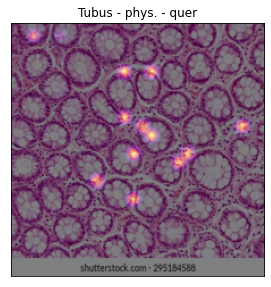

In [24]:
visualize_attention(figsize=(10,10),image=img,rois=[roi],classes=[classes[output.argmax()]],truth="Tubus - phys. - schraeg",show_original=False)

(1080, 654)